### STA 4724: Homework 5 - Due Monday, Nov 24  
**Instructions**: Finsih the assign by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name:** Mustaeen Ahmed       

**Your ID:** 5530892

## Question 1: Image Denoise via PCA
Many medical images, such as MRI, are low-rank. Medical image denoising is an active research field. A simple PCA won't achieve state-of-the-art denoising result, yet it is one of the simplest methods that give us some level of denoising.

**(a)** Read the noisy MRI image.

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_noisy = cv2.imread("MRI_noisy.png")

Based on how you read the image. If you read the image as a color image (that is, the data matrix has RGB color channels), then convert it to a grayscale image. Write "N/A" if you directly read it as a grayscale image.

In [47]:
img_gray = cv2.cvtColor(img_noisy, cv2.COLOR_BGR2GRAY)

**(b)** Print the images denoised/reconstructed with rank $r = 1, 2, 3, 5, 10, 20$.

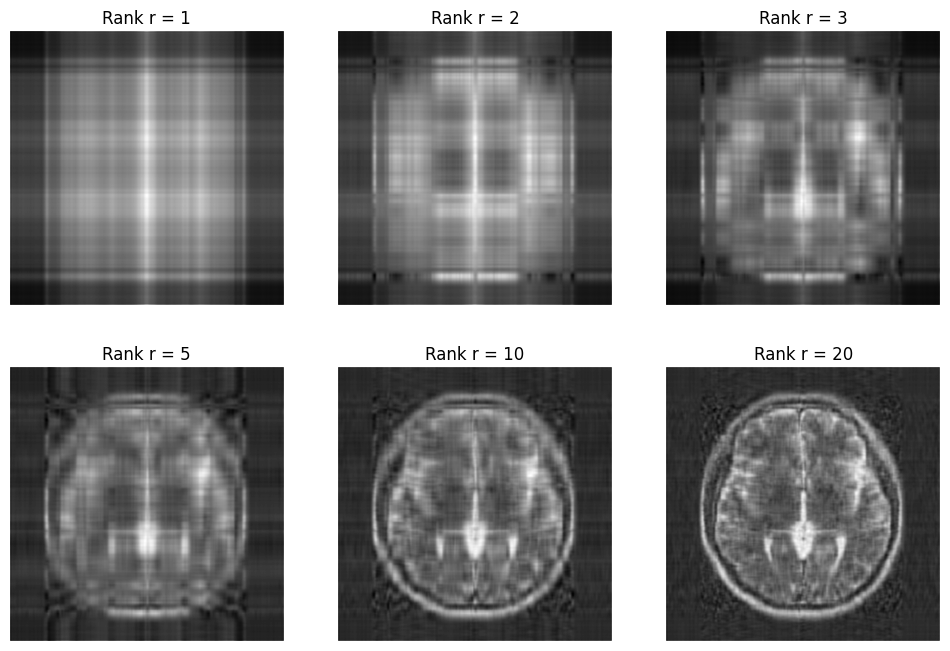

In [48]:
A = img_gray.astype(float)

U, S, VT = np.linalg.svd(A, full_matrices=False)

rank = [1, 2, 3, 5, 10, 20]
plt.figure(figsize=(12, 8))

for i, ra in enumerate(rank):
    ar = U[:, :ra] @ np.diag(S[:ra]) @ VT[:ra, :]

    plt.subplot(2, 3, i+1)
    plt.imshow(ar, cmap="gray")
    plt.title(f"Rank r = {ra}")
    plt.axis("off")
    
plt.show()

**(c)** Read the clear MRI image, convert it to grayscale if needed. 

In [49]:
img_clear = cv2.imread("MRI_clear.png")

img_clear_gray = cv2.cvtColor(img_clear, cv2.COLOR_BGR2GRAY)

Use the clear image as your reference to find the best rank for this denoising task. 

Hint1: Use a loop to try different ranks.

Hint2: The best noised image should be the one most similar to the clear image, which means the different between the images is smaller. Use Frobenius norm.


Best Rank = 50
Smallest Error = 10560.497678273283


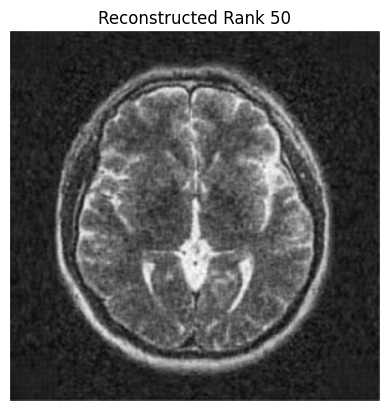

In [50]:
a_noisy = img_gray.astype(float)
a_clear = img_clear_gray.astype(float)

U, S, VT = np.linalg.svd(a_noisy, full_matrices=False)

ranks = [1, 2, 3, 5, 10, 20, 30, 40, 50, 75, 100, 150, 200]
errors = []
best_rank = None
best_error = float("inf")

for ra in ranks:
    aR = U[:, :ra] @ np.diag(S[:ra]) @ VT[:ra, :]

    error = np.linalg.norm(aR - a_clear, ord="fro")
    errors.append(error)

    if error < best_error:
        best_error = error
        best_rank = ra

print(f"Best Rank = {best_rank}")
print(f"Smallest Error = {best_error}")

r = 50
ar50 = U[:, :r] @ np.diag(S[:r]) @ VT[:r, :]
plt.imshow(ar50, cmap="gray")
plt.title("Reconstructed Rank 50")
plt.axis("off")
plt.show()

What's the best rank for this denoising task?

**Answer**:  50

## Question 2: Support Vector Machine

you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the
*Auto* dataset.

**(a)** Load the dataset.

In [51]:
import pandas as pd

df = pd.read_csv("auto.csv")

Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median. 

Hint: You need to find the median first.

In [52]:
median_mpg = df["mpg"].median()
print(f"Median MPG is: {median_mpg}")

df["high_mpg"] = (df["mpg"] > median_mpg).astype(int)
print(df[["mpg", "high_mpg"]].head())

Median MPG is: 22.75
    mpg  high_mpg
0  18.0         0
1  15.0         0
2  18.0         0
3  16.0         0
4  17.0         0


**(b)** Fit a support vector classifier to the data with various parameters of the cars, in order to predict whether a car gets high or low gas mileage. 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df[["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]]
y = df["high_mpg"]

X = X.replace("?", pd.NA).astype(float)
X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

svc_linear = SVC(kernel="linear", C=1)
svc_linear.fit(X_train, y_train)

y_pred_linear = svc_linear.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVC Accuracy: {acc_linear}")

Linear SVC Accuracy: 0.8898305084745762


Report the cross-validation errors associated with different values of *cost*.

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

costs = [0.01, 0.1, 1, 10, 100]
errors = []

for cost in costs:
    svc = SVC(kernel="linear", C=cost)
    scores = cross_val_score(svc, X, y, cv=10)
    cv_error = 1 - scores.mean()
    errors.append(cv_error)

    print(f"C = {cost}, Cross-Validation Error = {cv_error:.4f}")

C = 0.01, Cross-Validation Error = 0.0968
C = 0.1, Cross-Validation Error = 0.0992
C = 1, Cross-Validation Error = 0.1094
C = 10, Cross-Validation Error = 0.1069
C = 100, Cross-Validation Error = 0.1069


**(c)** Now repeat (b), this time using SVMs with polynomial kernel, with different values of degree *d* and *cost*.

In [55]:
degrees = [2, 3, 4, 5]
costs = [0.01, 0.1, 1, 10, 100]

res = []

for d in degrees:
    for cost in costs:
        svc_poly = SVC(kernel="poly", degree=d, C=cost)
        scores = cross_val_score(svc_poly, X, y, cv=10)
        cv_error = 1 - scores.mean()

        res.append((d, cost, cv_error))
        print(f"Degree = {d}, C = {cost}, Cross-Validation Error = {cv_error:.4f}")

Degree = 2, C = 0.01, Cross-Validation Error = 0.1990
Degree = 2, C = 0.1, Cross-Validation Error = 0.1174
Degree = 2, C = 1, Cross-Validation Error = 0.1226
Degree = 2, C = 10, Cross-Validation Error = 0.1149
Degree = 2, C = 100, Cross-Validation Error = 0.0996
Degree = 3, C = 0.01, Cross-Validation Error = 0.1711
Degree = 3, C = 0.1, Cross-Validation Error = 0.1199
Degree = 3, C = 1, Cross-Validation Error = 0.1226
Degree = 3, C = 10, Cross-Validation Error = 0.1097
Degree = 3, C = 100, Cross-Validation Error = 0.1022
Degree = 4, C = 0.01, Cross-Validation Error = 0.1583
Degree = 4, C = 0.1, Cross-Validation Error = 0.1251
Degree = 4, C = 1, Cross-Validation Error = 0.1200
Degree = 4, C = 10, Cross-Validation Error = 0.1097
Degree = 4, C = 100, Cross-Validation Error = 0.1021
Degree = 5, C = 0.01, Cross-Validation Error = 0.1506
Degree = 5, C = 0.1, Cross-Validation Error = 0.1225
Degree = 5, C = 1, Cross-Validation Error = 0.1200
Degree = 5, C = 10, Cross-Validation Error = 0.1251
D